## Insights on Latoya Clarke, Daniella Mcalla , Mardon Bailey Wine Points Prediction 

From IreneTwo (30/3/2019):

Here I'll share my insights/ probems on analysing wine points prediction, the original codes are prepared By Latoya Clarke, Daniella Mcalla , Mardon Bailey on https://www.kaggle.com/latoyaclarke/knowledge-discovery-in-databases-kdd. I do not own these codes & I did some minor modification on the codes.

What will be covered:
- instance / parameters explanation and how these are being used for data analysis/ machine learning
- data-preprocessing techniques
- prediction analysis: Decision Tree Regressor (DTR) and Multi-Layer Perceptron Regressor (MLPR).
to predict the points Roger Voss would give a wine
- Decision Tree Regressor (DTR)
- Multi-Layer Perceptron Regressor (MLPR).

## matplotlib.rcParams
An instance of RcParams for handling default matplotlib values.

the sklearn.metrics module includes score functions, performance metrics and pairwise metrics and distance computations.

## sklearn.metrics.mean_squared_error
(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
To analyse mean squared error regression loss later

In [4]:
# melier : A wine expert/specialist. A knowledgeable wine professional
###### Wine Tasting Review:  sensory examination and evaluation of a wine. (i.e. taste, smell, feel & look of wine)
###### Vintage Year : The year on a bottle of wine which denotes that most if not all the grapes used to make that bottle of wine were harvested in that pecified year

# Libraries needed 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
import warnings
import re
warnings.filterwarnings('ignore')
%matplotlib inline
#random_state = 1
plt.rcParams['figure.figsize']=8,8


In [6]:
# load wine dataset into notebook
data_path = r'C:\Users\Aspire\Downloads\winemag-data-130k-v2.csv'
wine_data = pd.read_csv(data_path)

## What will be carried out later on
- brief view on first and last few elements in dataset
- gain useful info about the data
- data cleaning
- Display Distribution of points for initial dataset
- Data visualization

In [7]:
print("Wine Data Dimension:",wine_data.shape)
wine_data.head(3) #disply first 5 elements in dataset

Wine Data Dimension: (129971, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [8]:
wine_data.tail(3) #displays last 3 elements in dataset

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [9]:
# check to see if there are spaces in column names
wine_data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [10]:
wine_data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [11]:
# Useful information about the data
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


Text(0.5, 1.0, 'Fig.1: Points Distribution')

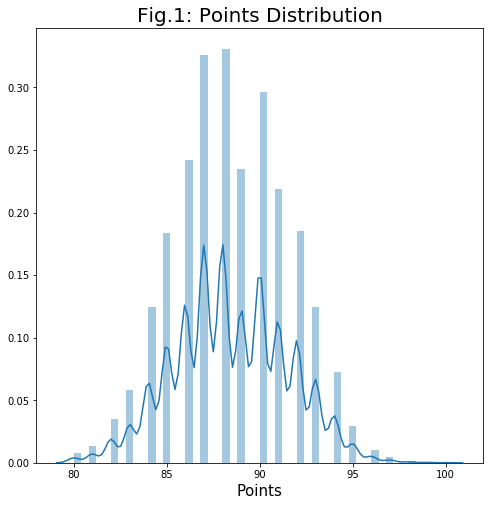

In [12]:
# Distribution of points for initial dataset
sns.distplot(wine_data.points) 
plt.xlabel("Points",size=15)
plt.title("Fig.1: Points Distribution", size=20)

## Wine Tasters and the Amount of Wines Evaluated
use value_counts() to display data in DESCENDING order, to find frequency series

plot(kind='line') will return data in line graph, while plot(kind='bar') will return data in bar graph.

why use plt.xticks: Get or set the x-limits of the current tick locations and labels.


Text(0.5, 1.0, 'Fig. 2: Wine Tasters and the Amount of Wines Evaluated')

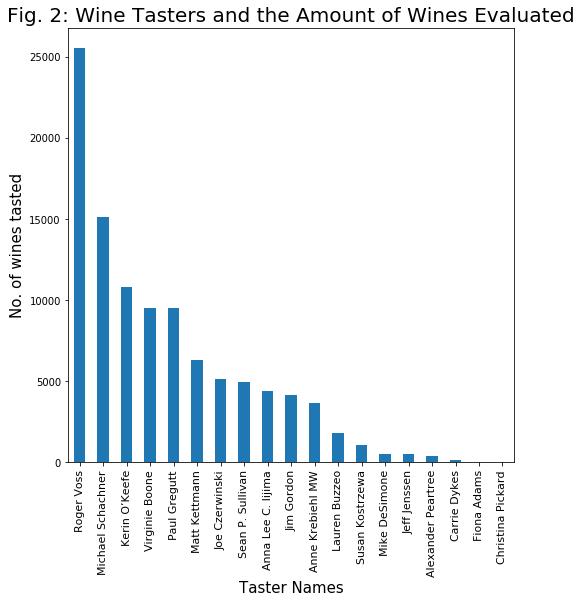

In [13]:

wine_data['taster_name'].value_counts().plot(kind='bar')
plt.xticks(fontsize=11)
plt.xlabel("Taster Names",size=15)
plt.ylabel('No. of wines tasted', size=15)
plt.title("Fig. 2: Wine Tasters and the Amount of Wines Evaluated", size=20)

Refer code below: 
Equal sign "==" : 1 == 1 is a equality check which simply means “Is 1 equal to 1?”

In [14]:


# Selecting sample of the data that will be used (i.e. the wines evaluated by Roger Voss)
wine_data = wine_data[(wine_data['taster_name']=='Roger Voss') | (wine_data['taster_twitter_handle']=='@vossroger')]
print("Wine Data Sample Dimension:",wine_data.shape,"(i.e. Wines evaluated by Roger Voss)") #dataset dimension
wine_data.head()

Wine Data Sample Dimension: (25514, 14) (i.e. Wines evaluated by Roger Voss)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
11,11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer
30,30,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,NaN,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone


In [15]:

# Measures of the numerical data (i.e. wines tasted by Roger Voss)
wine_data.describe()

,Unnamed: 0,points,price
count,25514.000000,25514.000000,20172.000000
mean,64480.295524,88.708003,38.649960
std,37486.514606,3.036373,71.540473
min,1.000000,80.000000,5.000000
25%,32051.250000,86.000000,15.000000
50%,63917.500000,88.000000,22.000000
75%,96872.750000,91.000000,40.000000
max,129970.000000,100.000000,3300.000000


In [16]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25514 entries, 1 to 129970
Data columns (total 14 columns):
Unnamed: 0               25514 non-null int64
country                  25512 non-null object
description              25514 non-null object
designation              17963 non-null object
points                   25514 non-null int64
price                    20172 non-null float64
province                 25512 non-null object
region_1                 18635 non-null object
region_2                 2 non-null object
taster_name              25514 non-null object
taster_twitter_handle    25514 non-null object
title                    25514 non-null object
variety                  25514 non-null object
winery                   25514 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 2.9+ MB


Text(0.5, 1.0, 'Fig.3: Points Distribution for Wines Evaluated by Roger Voss ')

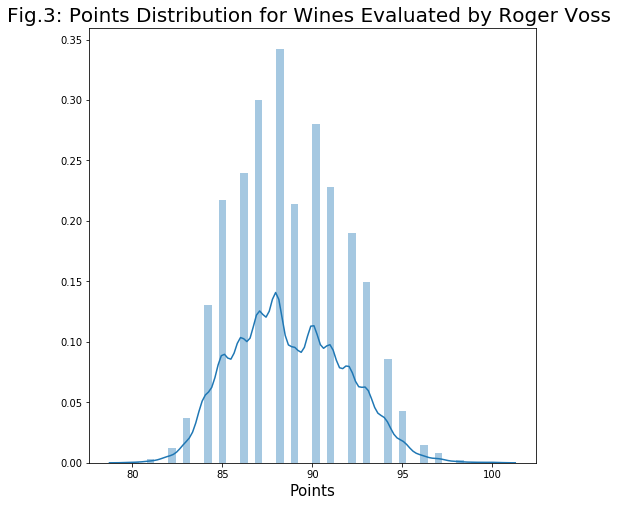

In [17]:
# Distribution of points for wines Roger Voss evaluated
sns.distplot(wine_data.points) 
plt.xlabel("Points",size=15)
plt.title("Fig.3: Points Distribution for Wines Evaluated by Roger Voss ", size=20)

Text(0.5, 0.98, 'Fig.4: Countries per bottle of Wine Evaluted by Roger Voss ')

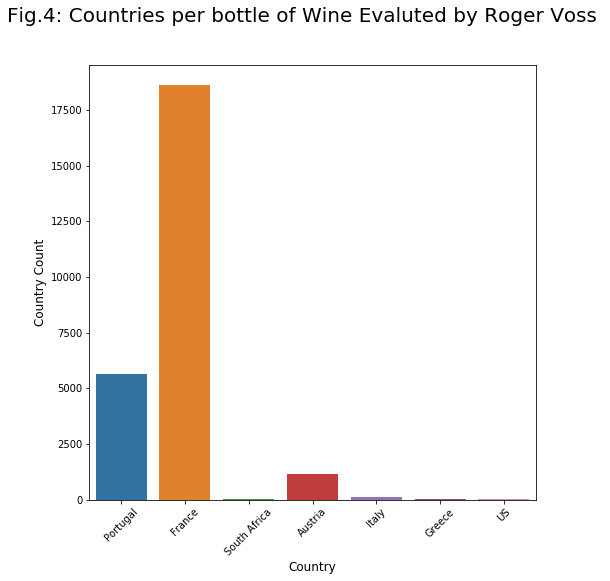

In [18]:
sns.countplot(x='country',data=wine_data, orient="h")
plt.ylabel('Country Count',size=12)
plt.xlabel("Country",size=12)
plt.xticks(rotation=45)
plt.suptitle("Fig.4: Countries per bottle of Wine Evaluted by Roger Voss ", size=20)

From above, we see France is the country that hits the highest frequency to get evaluated per bottle of Wine by Roger Voss 



## Steps in Data Preprocessing
Step 1 : Import the libraries
Step 2 : Import the data-set
Step 3 : Check out the missing values
Step 4 : See the Categorical Values
Step 5 : Splitting the data-set into Training and Test Set
Step 6 : Feature Scaling

##  When inplace=True is passed, the data is renamed in place (it returns nothing)

In [19]:
# Rename column 'serial' to 'wine_id'
wine_data.rename(columns={'serial':'wine_Id'}, inplace=True)
wine_data.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


DROP DUPLICATES

## DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)
[source]

Return DataFrame with duplicate rows removed, optionally only considering certain columns.

In [20]:
##print(wine_data.duplicated(subset=None, keep='first').sum(),"duplicate record(s)")

fEATURE EXTRACTION:
to present the year of each wine

## Series.str.extract(pat, flags=0, expand=True)
[source]
Extract capture groups in the regex pat as columns in a DataFrame.
For each subject string in the Series, extract groups from the first match of regular expression pat.

## expand : bool, default False
Expand the splitted strings into separate columns.
If True, return DataFrame/MultiIndex expanding dimensionality.
If False, return Series/Index, containing lists of strings.


In [22]:

wine_data['year'] = wine_data['title'].str.extract('(\d\d\d\d)', expand=True)

In [23]:
# Check to see if there are any null years
wine_data['year'].isnull().value_counts()

False    23867
True      1647
Name: year, dtype: int64

In [26]:
# wines that does not have a year in the title
#Wines without a year are classified as Non-Vintage wines
wine_data.title[wine_data['year'].isnull()].head()

Series([], Name: title, dtype: object)

## to ease the searches for preprocessing, convert year to int 


## pandas.to_numeric(arg, errors='raise', downcast=None)

Convert argument to a numeric type. The default return dtype is float64 or int64 depending on the data supplied. Use the downcast parameter to obtain other dtypes.

## errors : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
If ‘coerce’, then invalid parsing will be set as NaN

## DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
df.fillna(0): Replace all NaN elements with 0s

## astype(np.int64)
 to convert a column from data type float64 to int64

In [27]:

wine_data.year = pd.to_numeric(wine_data.year, errors='coerce').fillna(0).astype(np.int64)

In [30]:
# check fo erroneous years (NB: its year 2018, any year above this is invalid)
print((wine_data['year']>2018).sum(),"invalid year(s)")

0 invalid year(s)


## Feature engineering
if done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process. ----Amit Shekhar, author at MindOrks

In [33]:
# Applying feature engineering to create type of wine (Vintage/n\Non-Vintage)
# !=0 means not equal to 0
# ==0 means equal to 0
wine_data['type']= None
wine_data.type[wine_data['year']!=0] = 'Vintage'
wine_data.type[wine_data['year']==0] = 'Non-Vintage'

## Series.str.split(pat=None, n=-1, expand=False)

Splits the string in the Series/Index from the beginning, at the specified delimiter string. Equivalent to str.split().

## str. split parameters
pat : String or regular expression to split on. If not specified, split on whitespace.

n : int, Limit number of splits in output. None, 0 and -1 will be interpreted as return all splits. | 

expand : If True, return DataFrame/MultiIndex expanding dimensionality.

In [34]:
# Create loation by feature extraction from title
no_location = wine_data['title'].str.split('(', expand=True, n=1)
#wine_data['location'] = no_location.str.extract('(', expand=True)
#wine_data
no_location=no_location[1].str.split(')', expand=True, n=1)
wine_data['location']=no_location[0]

#wine_data[wine_data['location'].isnull()==True]

In [35]:
# impute location from region_2,region_1,province 
wine_data['location'].fillna(wine_data.region_2, inplace = True) 
wine_data['location'].fillna(wine_data.region_1, inplace = True)
wine_data['location'].fillna(wine_data.province, inplace = True)

In [37]:
# look for missing locations and country
print(wine_data['location'].isnull().sum(),"missing location(s) and",wine_data['country'].isnull().sum(),"missing countries") #check for null locations

#impute missing location and country from title research
wine_data.location.fillna('Bordeaux',inplace=True)
wine_data.country.fillna('France',inplace=True)

print("are attributed to 'Bordeaux' region in 'France' based on research of wine titles")

0 missing location(s) and 0 missing countries
are attributed to 'Bordeaux' region in 'France' based on research of wine titles


In [38]:
# look for missing prices
print(wine_data['price'].isnull().sum(),"missing price(s)") #check for null prices

#impute missing prices with the median price
wine_data.price.fillna(wine_data['price'].median(),inplace=True)
print("imputed from median price")

5342 missing price(s)
imputed from median price


In [40]:

# Use .drop() to drop columns that are not needed
wine_data_2 = wine_data.drop(['designation','region_1','region_2','taster_twitter_handle','description','province','taster_name'],axis=1)
wine_data_2.head()

,Unnamed: 0,country,points,price,title,variety,winery,year,type,location
1,1,Portugal,87,15.0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,Vintage,Douro
7,7,France,87,24.0,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,2012,Vintage,Alsace
9,9,France,87,27.0,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012,Vintage,Alsace
11,11,France,87,30.0,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer,2012,Vintage,Alsace
30,30,France,86,22.0,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone,2012,Vintage,Beaujolais-Villages


## check  no missing values identified

In [42]:
wine_data_2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25514 entries, 1 to 129970
Data columns (total 10 columns):
Unnamed: 0    25514 non-null int64
country       25514 non-null object
points        25514 non-null int64
price         25514 non-null float64
title         25514 non-null object
variety       25514 non-null object
winery        25514 non-null object
year          25514 non-null int64
type          25514 non-null object
location      25514 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 2.1+ MB


## guide for data Transformation

## sklearn.preprocessing package
LabelEncoder: Encode labels with value between 0 and n_classes-1.

{} creates an empty dictionary

np.issubdtype: check if numpy dtype is integral. Returns True if first argument is a typecode lower/equal in type hierarchy

fit(df[column]) : Fit The Label Encoder

In [44]:
# Label encoder transforms nominal features into numerical labels which algorithms can make sense of
def create_label_encoder_dict(df):
    from sklearn.preprocessing import LabelEncoder
    
    label_encoder_dict = {}
    
    for column in df.columns:
        if not np.issubdtype(df[column].dtype, np.number) and column != 'year':
            label_encoder_dict[column]= LabelEncoder().fit(df[column])
    return label_encoder_dict

In [45]:
label_encoders = create_label_encoder_dict(wine_data_2)
#print("Encoded Values for each Label")
#print("="*32)
#for column in label_encoders:
 #   print("="*32)
 #   print('Encoder(%s) = %s' % (column, label_encoders[column].classes_ ))
  #  print(pd.DataFrame([range(0,len(label_encoders[column].classes_))], columns=label_encoders[column].classes_, index=['Encoded Values']  ).T)

## Apply each encoder to the data set to obtain transformed values

In [46]:
wd3 = wine_data_2.copy() # create copy of initial data set
for column in wd3.columns:
    if column in label_encoders:
        wd3[column] = label_encoders[column].transform(wd3[column])

print("Transformed data set")
print("="*32)
wd3.head()

Transformed data set


,Unnamed: 0,country,points,price,title,variety,winery,year,type,location
1,1,4,87,15.0,20538,134,3685,2011,1,160
7,7,1,87,24.0,21846,68,3850,2012,1,7
9,9,1,87,27.0,15505,129,3059,2012,1,7
11,11,1,87,30.0,16724,68,3207,2012,1,7
30,30,1,86,22.0,12164,64,2629,2012,1,24


## data mining

## sklearn.model_selection.cross_validate
Evaluate metric(s) by cross-validation and also record fit/score times 

(estimator, X, y=None, groups=None, scoring=None, cv=’warn’, n_jobs=None, verbose=0, fit_params=None, pre_dispatch=‘2*n_jobs’, return_train_score=’warn’, return_estimator=False, error_score=’raise-deprecating’)

## class sklearn.model_selection.KFold
(n_splits=’warn’, shuffle=False, random_state=None)

Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [50]:
# Function to do K-Fold Cross Validation
def cross_validate(x,y,kf_split):
    from sklearn.model_selection import KFold
    
    #K-Fold Cross Validation
    kf =KFold(n_splits=kf_split,shuffle=True,random_state=1)
    
    for train_index, test_index in kf.split(x):
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
    return [X_train,y_train,X_test,y_test]

## DecisionTreeRegressor
## random_state=1
 random_state is the random number generator
 

## MLPRegressor
Multi-layer Perceptron regressor.
This model optimizes the squared-loss using LBFGS or stochastic gradient descent.

## adam solver 
‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba. works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, ‘lbfgs’ can converge faster and perform better.

{‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’


## alpha : float, optional, default 0.0001
L2 penalty (regularization term) parameter

## ‘relu’ activation
‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
Activation function for the hidden layer:{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}


In [51]:
# Algorithms without Hyper Parameter Tuning
def pred_techniques(x,y,kf_split): 
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.neural_network import MLPRegressor

    train_test = cross_validate(x,y,kf_split) #perform kfold cross validation

    # Decision Tree Regressor
    reg = DecisionTreeRegressor(random_state=1) 
    reg.fit(train_test[0], train_test[1])
    
    
    # Multi-Layer Perceptron Regressor
    clf = MLPRegressor(solver='adam', alpha=1e-5, activation='relu',learning_rate_init =0.01,shuffle=True,
                    hidden_layer_sizes=(7, 4),random_state=1)
    clf.fit(train_test[0],train_test[1])
    
    return [reg,clf,train_test[2],train_test[3],train_test[0],train_test[1]]

In [52]:
# separate data into dependent (Y) and independent(X) variables
feature_cols =  ['variety','winery','location', 'year']
x_data = wd3[feature_cols]
y_data = wd3['points']

l = pred_techniques(x_data,y_data,100)
print("Fig.5: Feature Significance") 
pd.DataFrame([ "%.2f%%" % perc for perc in (l[0].feature_importances_ * 100) ], index = x_data.columns, columns = ['Feature Significance in Decision Tree'])

Fig.5: Feature Significance


,Feature Significance in Decision Tree
variety,17.31%
winery,34.28%
location,31.78%
year,16.63%


## Interpretation/Evaluation

## score(X, y[, sample_weight])
Returns the coefficient of determination R^2 of the prediction.

In [53]:
# Accuracy Test Scores of both techniques 
r2_tree = l[0].score(l[2],l[3])
r2_nn = l[1].score(l[2],l[3])

print("Decision Tree Regressor")
print("="*32)
print("R Square:",r2_tree )


print("\nMulti-Layer Perceptron Regressor")
print("="*32)
print("R Square:",r2_nn)

Decision Tree Regressor
R Square: 0.2782758795086844

Multi-Layer Perceptron Regressor
R Square: 0.02065691899302291


In [54]:

# Actual points and Predicted points by both models plus 4 predictor variables on left
results= l[2].copy()
results['Actual Points']=l[3]
pred_tree=l[0].predict(l[2])
pred_mlp=l[1].predict(l[2])
results['Dec_Tree_Reg']=pred_tree
results['MLP_Regressor']=pred_mlp
print("Fig.6: Actual Points and Predicted Points yielded from both Models")
results.head()

Fig.6: Actual Points and Predicted Points yielded from both Models


,variety,winery,location,year,Actual Points,Dec_Tree_Reg,MLP_Regressor
96,64,2977,324,2015,88,87.0,88.700308
151,137,2980,1,2014,91,90.0,87.549230
887,137,3346,160,2009,90,87.0,88.542322
1339,153,2314,113,2016,90,88.0,88.596324
1377,137,3640,160,2007,86,83.0,88.389821


In [55]:
# Calculate Variance in both models
mse_treg = mean_squared_error(l[3],pred_tree)
mse_nn = mean_squared_error(l[3],pred_mlp)

# Calculate Standard Deviation in both models
rmse_treg = math.sqrt(mean_squared_error(l[3],pred_tree))
rmse_nn = math.sqrt(mean_squared_error(l[3],pred_mlp))

# Calcualte Mean Absolute Error in both models
mae_treg = mean_absolute_error(l[3],pred_tree)
mae_nn = mean_absolute_error(l[3],pred_mlp)

# Print evaluation metrics of both models
print("Decision Tree Regressor")
print("="*32)
print("MSE:",mse_treg)
print("RMSE:",rmse_treg)
print("MAE:",mae_treg)

print("\nMulti-Layer Perceptron Regressor")
print("="*32)
print("MSE:",mse_nn)
print("RMSE:",rmse_nn)
print("MAE:",mae_nn)

Decision Tree Regressor
MSE: 6.511155827763204
RMSE: 2.551696656690055
MAE: 1.7793059446000625

Multi-Layer Perceptron Regressor
MSE: 8.835308711779268
RMSE: 2.9724247192787354
MAE: 2.446113699775014


In [56]:
print("Neural Network Number of Perfect Predictions:")
results[results['MLP_Regressor']==results['Actual Points']].MLP_Regressor.count()

Neural Network Number of Perfect Predictions:


0

Text(0.5, 1.0, 'Fig.7: Actual Points vs Decision Tree Predicted Points')

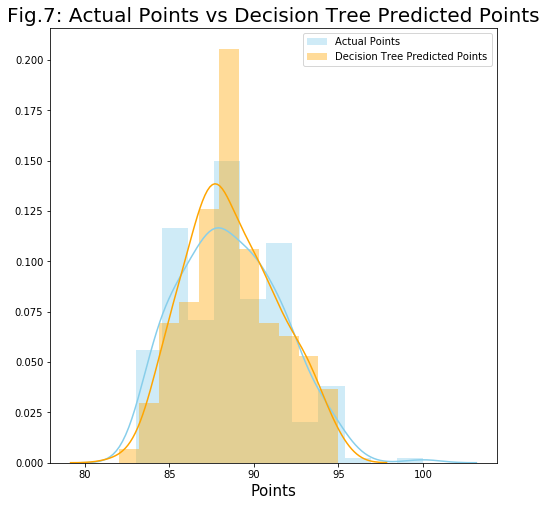

In [58]:
sns.distplot( results["Actual Points"] , color="skyblue", label="Actual Points")
sns.distplot( results["Dec_Tree_Reg"] , color="orange", label="Decision Tree Predicted Points")
plt.legend()
plt.xlabel("Points",size=15)
plt.title("Fig.7: Actual Points vs Decision Tree Predicted Points", size=20)

Text(0.5, 1.0, 'Fig.8: Actual Points vs Neural Network Predicted Points')

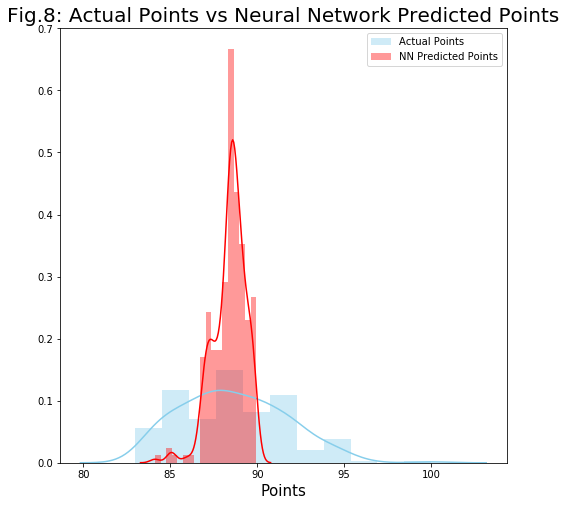

In [59]:

sns.distplot( results["Actual Points"] , color="skyblue", label="Actual Points")
sns.distplot( results["MLP_Regressor"] , color="red", label="NN Predicted Points")
plt.legend()
plt.xlabel("Points",size=15)
plt.title("Fig.8: Actual Points vs Neural Network Predicted Points", size=20)

In [60]:
print("Fig.9: Summary of Evaluation Metrics")
pd.DataFrame(dict(R_Square= [r2_tree,r2_nn],
                  MSE=[mse_treg,mse_nn], RMSE=[rmse_treg,rmse_nn],MAE=[mae_treg,mae_nn]),
                index=['Dec Tree Reg','MLP Reg'])

Fig.9: Summary of Evaluation Metrics


,R_Square,MSE,RMSE,MAE
Dec Tree Reg,0.278276,6.511156,2.551697,1.779306
MLP Reg,0.020657,8.835309,2.972425,2.446114
